In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [11]:
df = pd.read_csv('./final_grid_data_2.csv')
df

,Unnamed: 0,gid,geometry,cctv_cnt,securitylight_cnt,streetlight_cnt,womanpost_cnt,bell_cnt,park_cnt,patrol_cnt,...,m_90g_pop,w_90g_pop,m_100_pop,w_100g_pop,total_pop,adult_game_cnt,adult_play_cnt,adult_stay_cnt,TotalWeight,Range
0,0,다사49aa19ab,MULTIPOLYGON (((126.9247686191008 37.270765730...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
1,1,다사49aa19ba,MULTIPOLYGON (((126.9247514746132 37.273019120...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
2,2,다사49aa20aa,MULTIPOLYGON (((126.9247171799136 37.277525898...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
3,3,다사49ab18ab,MULTIPOLYGON (((126.9276564748467 37.261765825...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
4,4,다사49ab18ba,MULTIPOLYGON (((126.9276394219782 37.264019219...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085,2085,다사63ba21aa,MULTIPOLYGON (((127.0882242530667 37.287221520...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
2086,2086,다사63ba21ab,MULTIPOLYGON (((127.0882119728894 37.289474959...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
2087,2087,다사63ba21ba,MULTIPOLYGON (((127.0881996913453 37.291728398...,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,매우 좋음
2088,2088,다사63ba21bb,MULTIPOLYGON (((127.0881874084342 37.293981835...,0,0,2,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,2,매우 좋음


In [12]:
columns = ['gid', 'cctv_cnt', 'streetlight_cnt', 'securitylight_cnt', 'rep_cnt']

df = df[columns]
df

,gid,cctv_cnt,streetlight_cnt,securitylight_cnt,rep_cnt
0,다사49aa19ab,0,0,0,0
1,다사49aa19ba,0,0,0,0
2,다사49aa20aa,0,0,0,0
3,다사49ab18ab,0,0,0,0
4,다사49ab18ba,0,0,0,0
...,...,...,...,...,...
2085,다사63ba21aa,0,0,0,0
2086,다사63ba21ab,0,0,0,0
2087,다사63ba21ba,0,0,0,0
2088,다사63ba21bb,0,2,0,0


In [13]:
df_cctv = df[['gid','cctv_cnt', 'rep_cnt']]
df_streetlight = df[['gid', 'streetlight_cnt', 'rep_cnt']]
df_securitylight = df[['gid', 'securitylight_cnt', 'rep_cnt']]

In [14]:
df.describe()

,cctv_cnt,streetlight_cnt,securitylight_cnt,rep_cnt
count,2090.000000,2090.000000,2090.000000,2090.000000
mean,5.781340,11.698086,6.871770,107.064115
std,8.349563,14.085163,13.777477,265.427976
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,2.000000,7.000000,0.000000,16.000000
75%,9.000000,20.000000,6.000000,115.750000
max,50.000000,130.000000,134.000000,4729.000000


In [15]:
df_cctv['cctv_category'] = pd.cut(df_cctv['cctv_cnt'], 5, duplicates='drop', labels=False)
df_securitylight['sec_category'] = pd.cut(df_securitylight['securitylight_cnt'], 5, duplicates='drop', labels=False)
df_streetlight['st_category'] = pd.cut(df_streetlight['streetlight_cnt'], 5, duplicates='drop', labels=False)

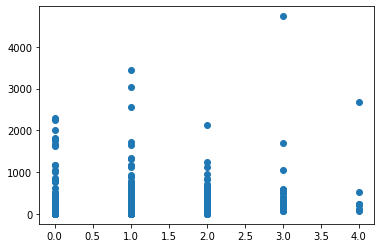

In [16]:
plt.scatter(df_cctv['cctv_category'], df_cctv['rep_cnt'])
plt.show()

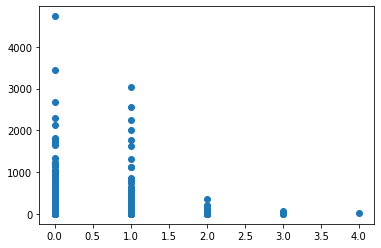

In [17]:
plt.scatter(df_streetlight['st_category'], df_streetlight['rep_cnt'])
plt.show()

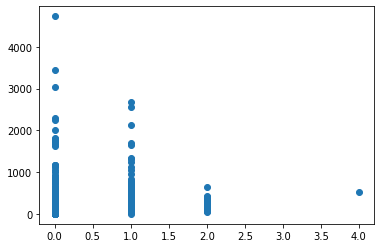

In [18]:
plt.scatter(df_securitylight['sec_category'], df_securitylight['rep_cnt'])
plt.show()

In [19]:
df_scatter = pd.DataFrame()
df_scatter['rep_cnt'] = df['rep_cnt']
df_scatter['cctv_category'] = df_cctv['cctv_category']
df_scatter['sec_category'] = df_securitylight['sec_category']
df_scatter['st_category'] = df_streetlight['st_category']
df_scatter

,rep_cnt,cctv_category,sec_category,st_category
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2085,0,0,0,0
2086,0,0,0,0
2087,0,0,0,0
2088,0,0,0,0
